In [1]:
import numpy as np
import pandas as pd

world_covid19 = pd.read_csv('world.csv')
world_covid19

,ID,iso_code,洲名,國家,日期,總確診數,新增確診數,七天移動平均新增確診數,總死亡數,新增死亡數,...,七天移動平均疫苗新增接種劑數,每百人接種疫苗劑數,每百人接種疫苗人數,疫情控管指數,總人口數,中位數年紀,70歲以上人口比例,平均壽命,解除隔離數,解封指數
0,1,AFG,亞洲,阿富汗,2020-02-24,5,5,0.000,0,0,...,0.0,0.00,0.00,8.33,39835428,18.6,1.337,64.83,0,99999.0
1,2,AFG,亞洲,阿富汗,2020-02-25,5,0,0.000,0,0,...,0.0,0.00,0.00,8.33,39835428,18.6,1.337,64.83,0,99999.0
2,3,AFG,亞洲,阿富汗,2020-02-26,5,0,0.000,0,0,...,0.0,0.00,0.00,8.33,39835428,18.6,1.337,64.83,0,99999.0
3,4,AFG,亞洲,阿富汗,2020-02-27,5,0,0.000,0,0,...,0.0,0.00,0.00,8.33,39835428,18.6,1.337,64.83,0,99999.0
4,5,AFG,亞洲,阿富汗,2020-02-28,5,0,0.000,0,0,...,0.0,0.00,0.00,8.33,39835428,18.6,1.337,64.83,0,99999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179878,179879,ZWE,非洲,辛巴威,2022-04-14,247208,48,48.286,5462,2,...,31909.0,66.98,38.22,0.00,15092171,19.6,1.882,61.49,0,99999.0
179879,179880,ZWE,非洲,辛巴威,2022-04-15,247237,29,44.571,5462,0,...,26342.0,67.08,38.27,0.00,15092171,19.6,1.882,61.49,0,99999.0
179880,179881,ZWE,非洲,辛巴威,2022-04-16,247237,0,44.571,5462,0,...,18715.0,67.17,38.35,0.00,15092171,19.6,1.882,61.49,0,99999.0
179881,179882,ZWE,非洲,辛巴威,2022-04-17,247278,41,45.714,5463,1,...,17122.0,67.22,38.39,0.00,15092171,19.6,1.882,61.49,0,99999.0


In [4]:
all_covid19 = world_covid19.reindex(columns=['洲名','國家','日期','新增確診數','新增死亡數'])
all_covid19

,洲名,國家,日期,新增確診數,新增死亡數
0,亞洲,阿富汗,2020-02-24,5,0
1,亞洲,阿富汗,2020-02-25,0,0
2,亞洲,阿富汗,2020-02-26,0,0
3,亞洲,阿富汗,2020-02-27,0,0
4,亞洲,阿富汗,2020-02-28,0,0
...,...,...,...,...,...
179878,非洲,辛巴威,2022-04-14,48,2
179879,非洲,辛巴威,2022-04-15,29,0
179880,非洲,辛巴威,2022-04-16,0,0
179881,非洲,辛巴威,2022-04-17,41,1


In [14]:
all_covid19.set_index('洲名').groupby(level=0)['新增確診數'].sum()

,新增確診數
洲名,
亞洲,291599382
全球,503902266
北美洲,190963900
南美洲,112771968
國際間,721
大洋洲,13212786
歐洲,376071866
歐洲聯盟,133945866
非洲,23183188


In [18]:
stata_statistic = all_covid19.set_index('洲名').groupby(level=0).sum(True)
stata_statistic

,新增確診數,新增死亡數
洲名,,
亞洲,291599382,2829684
全球,503902266,6159267
北美洲,190963900,2835918
南美洲,112771968,2535386
國際間,721,15
大洋洲,13212786,20080
歐洲,376071866,3592806
歐洲聯盟,133945866,1065151
非洲,23183188,504630


In [28]:
condi = (all_covid19['國家'] == '台灣') | (all_covid19['國家'] == '日本') | (all_covid19['國家'] == '法國') | (all_covid19['國家'] == '美國') | (all_covid19['國家'] == '澳大利亞')

counties = all_covid19[condi]
counties

,洲名,國家,日期,新增確診數,新增死亡數
9436,大洋洲,澳大利亞,2020-01-26,4,0
9437,大洋洲,澳大利亞,2020-01-27,1,0
9438,大洋洲,澳大利亞,2020-01-28,0,0
9439,大洋洲,澳大利亞,2020-01-29,1,0
9440,大洋洲,澳大利亞,2020-01-30,3,0
...,...,...,...,...,...
170268,北美洲,美國,2022-04-14,48634,678
170269,北美洲,美國,2022-04-15,36460,437
170270,北美洲,美國,2022-04-16,12439,51
170271,北美洲,美國,2022-04-17,7181,9


In [37]:
results = counties.set_index(keys=['洲名','國家']).groupby(level=['洲名','國家']).sum(True).T
results

洲名        亞洲                北美洲      大洋洲        歐洲
國家        台灣       日本        美國     澳大利亞        法國
新增確診數  35985  7395606  80686309  5488442  28268381
新增死亡數    854    29052    988899     6807    144661

In [39]:
results.values[0]

array([   35985,  7395606, 80686309,  5488442, 28268381])

In [47]:
countries = [country for state,country in results.columns]
countries

['台灣', '日本', '美國', '澳大利亞', '法國']

/Users/roberthsu/Documents/virtualEnv/venv14/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21488 (\N{CJK UNIFIED IDEOGRAPH-53F0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/roberthsu/Documents/virtualEnv/venv14/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28771 (\N{CJK UNIFIED IDEOGRAPH-7063}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/roberthsu/Documents/virtualEnv/venv14/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/roberthsu/Documents/virtualEnv/venv14/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/roberthsu/Documents/virtualEnv/venv14/lib/python3.10/site-pac

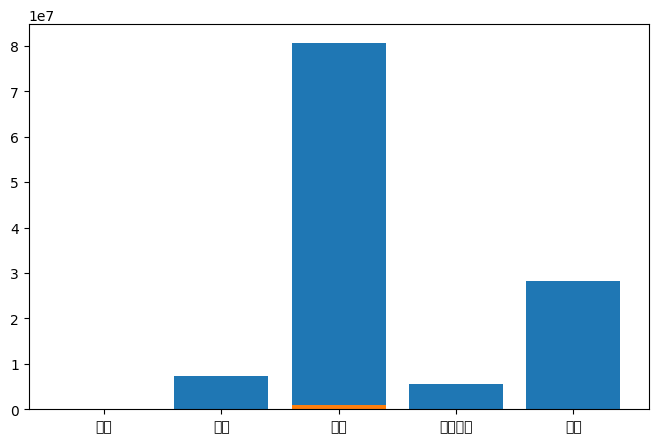

In [50]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(8,5))
axes = figure.add_subplot(1,1,1)
axes.bar(countries,results.values[0])
plt.show()